# Generate the Training Points

In [17]:
from trainingpoints import pk_linear

In [18]:
cosmos, pkl = pk_linear('lhs_900', redshift=0.0)

# Test Gaussian Process

In [44]:
import pandas as pd
import torch
import matplotlib.pylab as plt

# our script and functions
import utils.helpers as hp
from src.gp.gaussianprocess import GaussianProcess

# plotting tricks 
plt.rc("text", usetex=True)
plt.rc("font", **{"family": "sans-serif", "serif": ["Palatino"]})
fontSize = 20

In [45]:
NITER = 1000
LR = 0.01
NRES = 2

In [46]:
inputs = hp.load_csv('data', 'cosmologies_lhs_1000')
outputs = hp.load_csv('data', 'pk_linear_lhs_1000')

In [47]:
ins = torch.from_numpy(inputs.values)
out = torch.from_numpy(outputs.iloc[:,-1].values)

In [48]:
test = GaussianProcess(ins, out, jitter = 1E-10, xtrans = True, ytrans = True)
opt = test.optimisation(torch.randn(6), niter = NITER, lr = LR, nrestart = NRES)

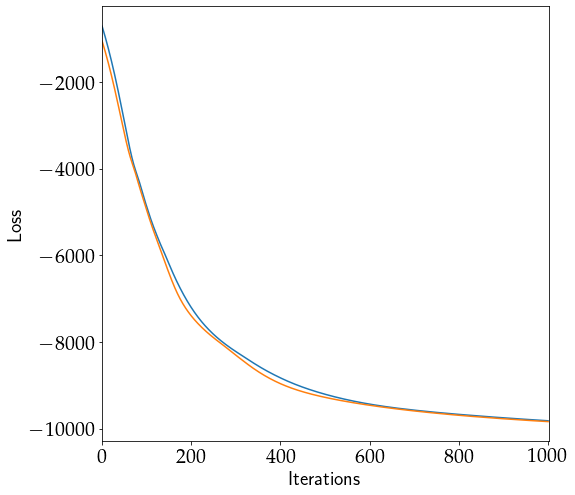

In [49]:
plt.figure(figsize = (8,8))
for i in range(len(opt)):  
    plt.plot(range(NITER + 1), opt[i]['loss'])
plt.xlim(0, NITER + 1)
plt.xlabel("Iterations", fontsize=fontSize)
plt.ylabel("Loss", fontsize=fontSize)
plt.tick_params(axis="x", labelsize=fontSize)
plt.tick_params(axis="y", labelsize=fontSize)
plt.show()

In [50]:
# parameter = {'Omega_b': 0.022, 'Omega_cdm': 0.12,'n_s': 1.0, 'h':0.75, 'ln10^{10}A_s': 3.0}
point = torch.tensor([0.12, 0.022, 3.0, 1.0, 0.75])

In [51]:
test.prediction(point, variance = True)

(tensor([[0.6997]], dtype=torch.float64),
 tensor([[1.5754e-13]], dtype=torch.float64))

Sometimes, the negative value for the GP uncertainty is due to numerical errors. Clip or increase jitter term. 

# CLASS

In [1]:
import matplotlib.pylab as plt 

import src.cosmology as sc
import config as CONFIG

# plotting tricks 
plt.rc("text", usetex=True)
plt.rc("font", **{"family": "sans-serif", "serif": ["Palatino"]})
fontSize = 20

In [2]:
module = sc.PowerSpectrum(CONFIG.Z_MIN, CONFIG.Z_MAX, CONFIG.K_MIN, CONFIG.K_MAX)
parameter = {'sigma8': 0.857570, 'Omega_cdm': 0.217284, 'Omega_b': 0.038872, 'h': 0.711447, 'n_s': 1.001982}
plin = module.pk_linear(cosmology=parameter)

In [3]:
pk = module.pk_nonlinear(cosmology=parameter)

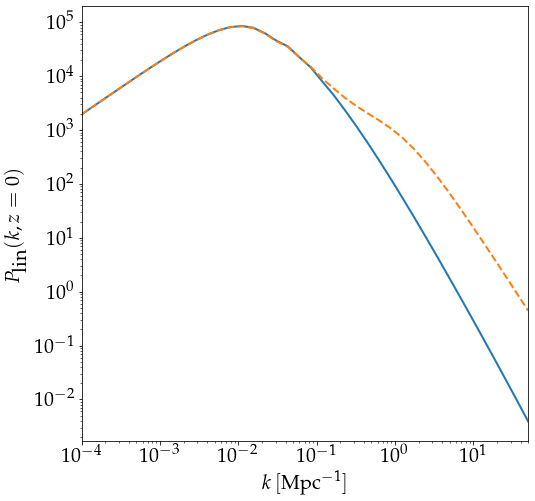

In [4]:
plt.figure(figsize = (8,8))
plt.loglog(module.wavenumber, plin, lw = 2)
plt.loglog(module.wavenumber, pk, lw = 2, linestyle = '--')
plt.xlim(module.k_min, module.k_max)
plt.ylabel(r'$P_{\textrm{lin}}(k,z=0)$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

# Train GPs

In [1]:
from src.gp.training import train_gps

In [2]:
gps = train_gps(1000, xtrans = True, ytrans = True, jitter = 1E-6)

Training GP 1
Training GP 2
Training GP 3
Training GP 4
Training GP 5
Training GP 6
Training GP 7
Training GP 8
Training GP 9
Training GP 10
Training GP 11
Training GP 12
Training GP 13
Training GP 14
Training GP 15
Training GP 16
Training GP 17
Training GP 18
Training GP 19
Training GP 20
Training GP 21
Training GP 22
Training GP 23
Training GP 24
Training GP 25
Training GP 26
Training GP 27
Training GP 28
Training GP 29
Training GP 30
Training GP 31
Training GP 32
Training GP 33
Training GP 34
Training GP 35
Training GP 36
Training GP 37
Training GP 38
Training GP 39
Training GP 40


# Load GPs and Make Predictions

In [15]:
import torch
import utils.helpers as hp 
import config as CONFIG

nlhs = 1000
param = [0.12, 0.045, 0.75, 1.0, 0.75]

# {'omega_cdm': 0.06, 'Omega_b': 0.0312626682907599, 'sigma8': 0.7472109111611265, 'n_s': 0.9550200730597134, 'h': 0.7497856888295104}

In [16]:
gps = list()

for i in range(CONFIG.NWAVE):
    gp = hp.load_list("gps/" + str(nlhs), "pk_linear_lhs_" + str(nlhs) + "_wave_" + str(i))
    gps.append(gp)

In [17]:
preds = list()

for i in range(CONFIG.NWAVE):
    pred = gps[i].prediction(torch.tensor(param), variance = False).data[0].item()
    preds.append(pred)

### Compare with CLASS

In [18]:
import matplotlib.pylab as plt
import src.cosmology as sc

# plotting tricks 
plt.rc("text", usetex=True)
plt.rc("font", **{"family": "sans-serif", "serif": ["Palatino"]})
fontSize = 20

In [19]:
module = sc.PowerSpectrum(CONFIG.Z_MIN, CONFIG.Z_MAX, CONFIG.K_MIN, CONFIG.K_MAX)
# parameter = {'omega_cdm': param[0], 'omega_b': param[1], 'ln10^{10}A_s': param[2], 'n_s': param[3], 'h':param[4]}
parameter = {'omega_cdm': param[0], 'Omega_b': param[1], 'sigma8': param[2], 'n_s': param[3], 'h':param[4]}
plin = module.pk_linear(cosmology=parameter)

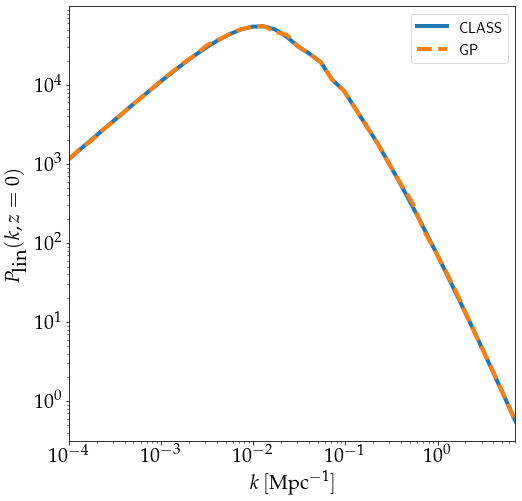

In [20]:
plt.figure(figsize = (8,8))
plt.loglog(module.wavenumber, plin, lw = 4, label = 'CLASS')
plt.loglog(module.wavenumber, preds, lw = 4, label = 'GP', linestyle = '--')
plt.xlim(module.k_min, module.k_max)
plt.ylabel(r'$P_{\textrm{lin}}(k,z=0)$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

# Points from the Prior

In [56]:
import torch
import numpy as np
import matplotlib.pylab as plt

# our scripts and functions
import utils.helpers as hp 
import src.cosmology as sc
from trainingpoints import generate_prior
import config as CONFIG

# plotting tricks 
plt.rc("text", usetex=True)
plt.rc("font", **{"family": "sans-serif", "serif": ["Palatino"]})
fontSize = 20

Load all the GPs

In [13]:
nlhs = 1000
gps = list()

for i in range(CONFIG.NWAVE):
    gp = hp.load_list("gps/" + str(nlhs), "pk_linear_lhs_" + str(nlhs) + "_wave_" + str(i))
    gps.append(gp)

Generate class for computing the linear matter power spectrum with CLASS.

In [ ]:
module = sc.PowerSpectrum(CONFIG.Z_MIN, CONFIG.Z_MAX, CONFIG.K_MIN, CONFIG.K_MAX)

Generate the prior distributions

In [25]:
# create an empty list to store the distributions
priors = {}

for param in CONFIG.COSMO:
    priors[param] = generate_prior(CONFIG.PRIORS[param])

Function to generate points from the prior.

In [27]:
def generate_points(priors: dict, number: int = 100) -> list:
    points = list()
    
    for i in range(number):
        point = {}
        
        for param in CONFIG.COSMO:
            point[param] = priors[param].rvs()
            
        points.append(point)
        
    return points

Function to make predictions using the emulator, given the list of GPs and the inputs (points).

In [36]:
def emulator_predictions(gps: list, points: list) -> list:
    
    npoints = len(points)
    predictions = list()
    
    for p in range(npoints):
        preds = list()
        param = list(points[p].values())
        for i in range(CONFIG.NWAVE):
            pred = gps[i].prediction(torch.tensor(param), variance = False).data[0].item()
            preds.append(pred)
        predictions.append(preds)
    return predictions

Function to make predictions using the simulator (CLASS) given the inputs (points).

In [40]:
def simulator_predictions(points: list) -> list:
    
    
    npoints = len(points)
    predictions = list()
    for p in range(npoints):
        plin = module.pk_linear(cosmology = points[p])
        predictions.append(plin)
    return predictions

### Quick Test

In [47]:
points = generate_points(priors, 3)

In [48]:
%%time
emu_preds = emulator_predictions(gps, points)

CPU times: user 16.8 ms, sys: 3.2 ms, total: 20 ms
Wall time: 18.2 ms


In [49]:
%%time
sim_preds = simulator_predictions(points)

CPU times: user 11.4 s, sys: 11.6 ms, total: 11.4 s
Wall time: 2.86 s


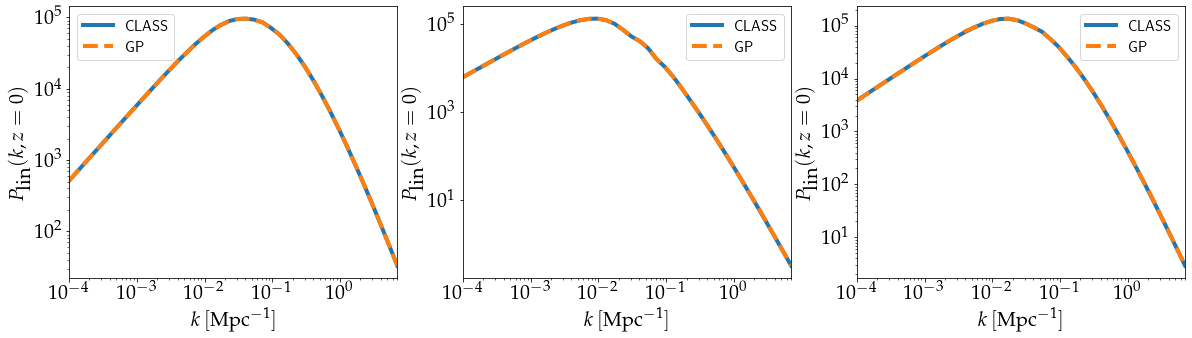

In [50]:
plt.figure(figsize = (20, 5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.loglog(module.wavenumber, sim_preds[i], lw = 4, label = 'CLASS')
    plt.loglog(module.wavenumber, emu_preds[i], lw = 4, label = 'GP', linestyle = '--')
    plt.xlim(module.k_min, module.k_max)
    plt.ylabel(r'$P_{\textrm{lin}}(k,z=0)$', fontsize = fontSize)
    plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
    plt.tick_params(axis='x', labelsize=fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)
    plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

### Generate Many Points and Compute Residuals

In [80]:
points = generate_points(priors, 200)

In [81]:
%%time
emu_preds = emulator_predictions(gps, points)

CPU times: user 740 ms, sys: 0 ns, total: 740 ms
Wall time: 740 ms


In [82]:
%%time
sim_preds = simulator_predictions(points)

CPU times: user 18min 9s, sys: 276 ms, total: 18min 9s
Wall time: 4min 32s


In [83]:
emu_preds = np.asarray(emu_preds) 
sim_preds = np.asarray(sim_preds)

### Interpolation

So we obtain smooth power spectrum, as a function of the wavenumber, $k$.

In [94]:
import scipy.interpolate as itp

def interpolate(inputs: list) -> np.ndarray:
    '''
    Function to interpolate the power spectrum along the redshift axis
    :param: inputs (list or tuple) : x values, y values and new values of x
    :return: ynew (np.ndarray) : an array of the interpolated power spectra
    '''

    x, y, xnew = np.log(inputs[0]), np.log(inputs[1]), np.log(inputs[2])

    spline = itp.splrep(x, y)

    ynew = itp.splev(xnew, spline)

    return np.exp(ynew)

In [95]:
wavenumbers = module.wavenumber
wavenumbers_new = np.geomspace(CONFIG.K_MIN, CONFIG.K_MAX, 1000)

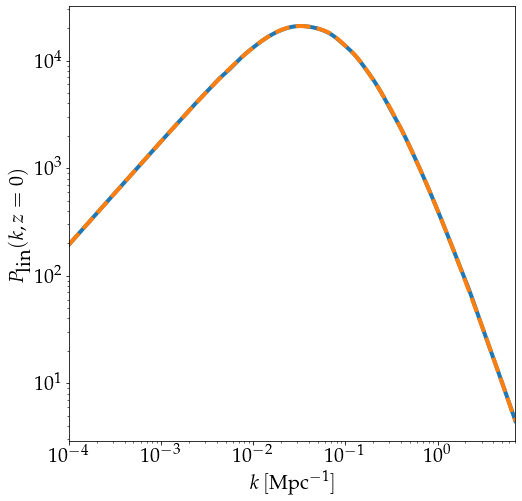

In [97]:
plt.figure(figsize = (8,8))
plt.loglog(wavenumbers_new, interpolate([wavenumbers, emu_preds[0], wavenumbers_new]), lw = 4, label = 'CLASS')
plt.loglog(wavenumbers_new, interpolate([wavenumbers, sim_preds[0], wavenumbers_new]), lw = 4, label = 'GP', linestyle = '--')
plt.xlim(module.k_min, module.k_max)
plt.ylabel(r'$P_{\textrm{lin}}(k,z=0)$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

In [100]:
emu_preds_int = np.asarray([interpolate([wavenumbers, emu_preds[i], wavenumbers_new]) for i in range(200)])
sim_preds_int = np.asarray([interpolate([wavenumbers, sim_preds[i], wavenumbers_new]) for i in range(200)])

In [101]:
diff = emu_preds_int - sim_preds_int
frac = diff/sim_preds_int

In [102]:
print(f'Maximum percentage error: {np.amax(np.abs(frac)) * 100:.2f}')

Maximum percentage error: 9.74


In [103]:
frac_mean = np.mean(frac, axis = 0)
frac_std = np.std(frac, axis = 0)

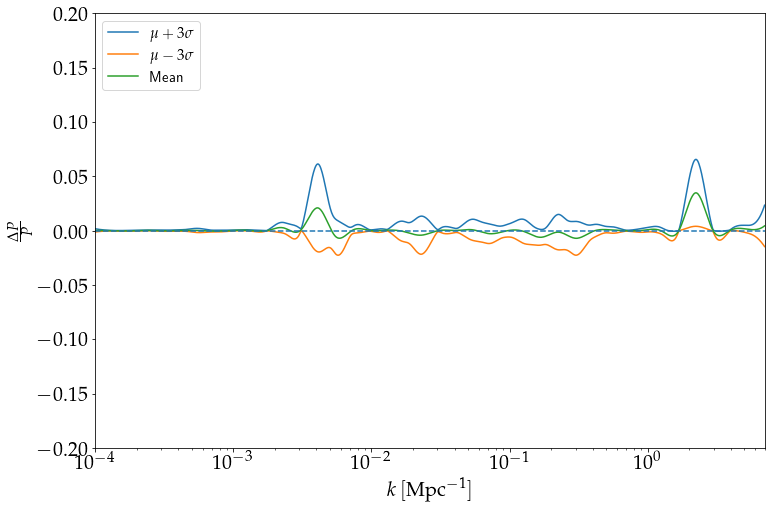

In [105]:
plt.figure(figsize = (12, 8))
plt.plot(wavenumbers_new, frac_mean + 3 * frac_std, label = r'$\mu + 3\sigma$')
plt.plot(wavenumbers_new, frac_mean - 3 * frac_std, label = r'$\mu - 3\sigma$')
plt.plot(wavenumbers_new, frac_mean, label = 'Mean')
plt.xlim(min(module.wavenumber), max(module.wavenumber))
plt.ylim(-0.2, 0.2)
plt.axhline(0, linestyle = '--')
plt.xscale('log')
plt.ylabel(r'$\frac{\Delta P}{P}$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'upper left',prop={'family':'sans-serif', 'size':15})
plt.show()

# Load $\alpha$ and Kernel Hyperparameters

We can load the kernel hyperparameters and the $\alpha$ at each wavenumber and make a prediction. 

The kernel is:

$$
k(\theta_{i}, \theta_{j}) = A\, \textrm{exp}\left[-\dfrac{1}{2}(\theta_{i} - \theta_{j})^{\textrm{T}}\Lambda^{-1}(\theta_{i} - \theta_{j})\right]
$$

If $p$ is the set of hyperparameters:

$A\rightarrow \textrm{exp}(p_{0})$

and 

$$
\Lambda^{-1}\rightarrow\left(\begin{array}{ccccc}
\frac{1}{\textrm{exp}(2p_{1})} & 0 & 0 & 0 & 0\\
0 & \frac{1}{\textrm{exp}(2p_{2})} & 0 & 0 & 0\\
0 & 0 & \frac{1}{\textrm{exp}(2p_{3})} & 0 & 0\\
0 & 0 & 0 & \frac{1}{\textrm{exp}(2p_{4})} & 0\\
0 & 0 & 0 & 0 & \frac{1}{\textrm{exp}(2p_{5})}
\end{array}\right)
$$

I use the exponential trick to make sure all hyperparameters are positive. 

In [34]:
nlhs = 700
i = 0

In [35]:
pa_name = "params_" + str(nlhs) + "_wave_" + str(i)
al_name = "alpha_" + str(nlhs) + "_wave_" + str(i)

This is a vector of dimension 6, 1 for the amplitude and 5 for the characteristic lengthscales. 

In [36]:
hp.load_list("gps/" + str(nlhs), pa_name)

array([-0.12572466,  1.1221838 ,  0.1772099 , -0.20765261, -0.07635443,
        0.22086649], dtype=float32)

This is a vector of shape $700 \times 1$, that is, $\alpha\in\mathbb{R}^{700\times 1}$

In [42]:
hp.load_list("gps/" + str(nlhs), al_name).reshape(-1)[0:3] # only showing the first 3 values

array([  3.25040847, -21.989728  , -11.51387032])

# To Do in Julia

In [1]:
import numpy as np 
import matplotlib.pylab as plt 

import utils.helpers as hp 
import config as CONFIG

from injulia import JuliaPredictions
import src.cosmology as sc

# plotting tricks 
plt.rc("text", usetex=True)
plt.rc("font", **{"family": "sans-serif", "serif": ["Palatino"]})
fontSize = 20

### Load the relevant files

- Input training points
- Output training points (power spectra)
- Kernel Hyperparameters
- $\alpha$

We are using 40 wavenumbers, but we can add an extra step and interpolate the power spectrum over a finer grid.

In [2]:
nlhs = 1000

In [3]:
hyper = list()
alphas = list()

for i in range(CONFIG.NWAVE):
    pa_name = "params_" + str(nlhs) + "_wave_" + str(i)
    al_name = "alpha_" + str(nlhs) + "_wave_" + str(i)
    
    hyper.append(hp.load_list("gps/" + str(nlhs), pa_name))
    alphas.append(hp.load_list("gps/" + str(nlhs), al_name).reshape(-1))
    
hyper = np.asarray(hyper)
alphas = np.asarray(alphas)

In [4]:
xinputs = hp.load_csv('data', 'cosmologies_lhs_' + str(nlhs)).values
yinputs = hp.load_csv('data', 'pk_linear_lhs_' + str(nlhs)).values

### Prediction

In [5]:
param = np.array([0.12, 0.022, 2.7, 1.0, 0.75])
parameter = {'omega_cdm': param[0], 'omega_b': param[1], 'ln10^{10}A_s': param[2], 'n_s': param[3], 'h':param[4]}

In [6]:
emulator = JuliaPredictions(xinputs, yinputs, hyper, alphas, True, True)

In [11]:
%%timeit
plin_emu = emulator.mean_prediction(param)

3.85 ms ± 24.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
simulator = sc.PowerSpectrum(CONFIG.Z_MIN, CONFIG.Z_MAX, CONFIG.K_MIN, CONFIG.K_MAX)

In [12]:
%%timeit
plin_sim = simulator.pk_linear(cosmology=parameter)

939 ms ± 8.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


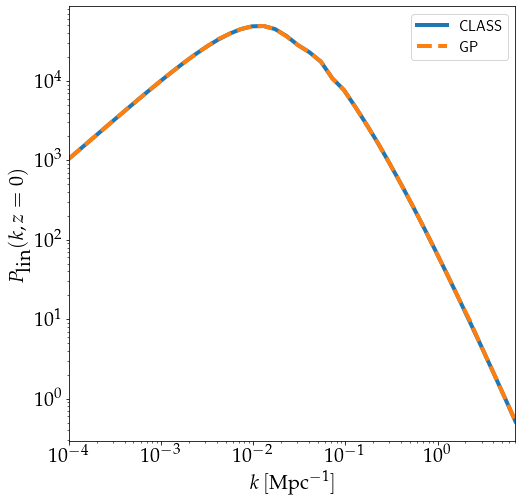

In [10]:
plt.figure(figsize = (8,8))
plt.loglog(simulator.wavenumber, plin_sim, lw = 4, label = 'CLASS')
plt.loglog(simulator.wavenumber, plin_emu, lw = 4, label = 'GP', linestyle = '--')
plt.xlim(simulator.k_min, simulator.k_max)
plt.ylabel(r'$P_{\textrm{lin}}(k,z=0)$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

In [14]:
939/3.85

243.89610389610388

# Test the GP

In [1]:
import pandas as pd
import torch
from gp.gaussianprocess import GaussianProcess

/home/harry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/harry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harry/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [11]:
cosmologies = pd.read_csv('data/cosmologies.csv', header = None)

In [13]:
pk_linear = pd.read_csv('data/pk_linear.csv', header = None)

In [16]:
x_input = torch.from_numpy(cosmologies.values)
y_input = torch.log(torch.from_numpy(pk_linear.iloc[:,0].values))

In [18]:
module = GaussianProcess(x_input, y_input, jitter=1E-6, xtrans=True)

AttributeError: module 'torch' has no attribute 'cov'